In [1]:
# import numpy as np
# import cv2

# # Video settings
# width, height = 800, 600
# fps = 30
# duration = 10  # seconds
# background = np.ones((height, width, 3), dtype=np.uint8) * 255

# # Ball settings
# class Ball:
#     def __init__(self, x, y, vx, vy, radius):
#         self.x = x
#         self.y = y
#         self.vx = vx
#         self.vy = vy
#         self.radius = radius

# # Set the same speed for both balls and increase the speed
# speed = 10
# ball1 = Ball(200, 300, speed, speed, 30)
# ball2 = Ball(600, 300, speed, speed, 30)

# # Create video writer
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('collision.mp4', fourcc, fps, (width, height))

# collision_count = 0

# # Animation loop
# for frame in range(fps * duration):
#     # Create new frame
#     canvas = background.copy()
    
#     # Update positions
#     ball1.x += ball1.vx
#     ball1.y += ball1.vy
#     ball2.x += ball2.vx
#     ball2.y += ball2.vy
    
#     # Check collision with walls for ball1
#     if ball1.x - ball1.radius <= 0 or ball1.x + ball1.radius >= width:
#         ball1.vx = -ball1.vx
#     if ball1.y - ball1.radius <= 0 or ball1.y + ball1.radius >= height:
#         ball1.vy = -ball1.vy
    
#     # Check collision with walls for ball2
#     if ball2.x - ball2.radius <= 0 or ball2.x + ball2.radius >= width:
#         ball2.vx = -ball2.vx
#     if ball2.y - ball2.radius <= 0 or ball2.y + ball2.radius >= height:
#         ball2.vy = -ball2.vy
    
#     # Check collision between balls
#     dx = ball2.x - ball1.x
#     dy = ball2.y - ball1.y
#     distance = np.sqrt(dx*dx + dy*dy)
    
#     if distance <= (ball1.radius + ball2.radius):
#         # Simple elastic collision
#         ball1.vx, ball2.vx = ball2.vx, ball1.vx
#         ball1.vy, ball2.vy = ball2.vy, ball1.vy
#         collision_count += 1
    
#     # Draw balls
#     cv2.circle(canvas, (int(ball1.x), int(ball1.y)), ball1.radius, (0,0,0), -1)
#     cv2.circle(canvas, (int(ball2.x), int(ball2.y)), ball2.radius, (0,0,0), -1)
    
#     # Write frame
#     out.write(canvas)

#     if collision_count >= 3:
#         # cho nó chuyển động 1 tý nữa rồi mới dừng
#         for i in range(10):
#             # Create new frame
#             canvas = background.copy()
            
#             # Update positions
#             ball1.x += ball1.vx
#             ball1.y += ball1.vy
#             ball2.x += ball2.vx
#             ball2.y += ball2.vy
            
#             # Check collision with walls for ball1
#             if ball1.x - ball1.radius <= 0 or ball1.x + ball1.radius >= width:
#                 ball1.vx = -ball1.vx
#             if ball1.y - ball1.radius <= 0 or ball1.y + ball1.radius >= height:
#                 ball1.vy = -ball1.vy
            
#             # Check collision with walls for ball2
#             if ball2.x - ball2.radius <= 0 or ball2.x + ball2.radius >= width:
#                 ball2.vx = -ball2.vx
#             if ball2.y - ball2.radius <= 0 or ball2.y + ball2.radius >= height:
#                 ball2.vy = -ball2.vy
            
#             # Check collision between balls
#             dx = ball2.x - ball1.x
#             dy = ball2.y - ball1.y
#             distance = np.sqrt(dx*dx + dy*dy)
            
#             if distance <= (ball1.radius + ball2.radius):
#                 # Simple elastic collision
#                 ball1.vx, ball2.vx = ball2.vx, ball1.vx
#                 ball1.vy, ball2.vy = ball2.vy, ball1.vy
            
#             # Draw balls
#             cv2.circle(canvas, (int(ball1.x), int(ball1.y)), ball1.radius, (0,0,0), -1)
#             cv2.circle(canvas, (int(ball2.x), int(ball2.y)), ball2.radius, (0,0,0), -1)
            
#             # Write frame
#             out.write(canvas)
#         break

# # Release video writer
# out.release()
# print("Video saved as collision.mp4")

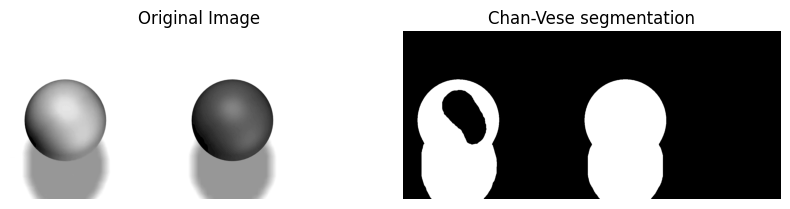

In [9]:
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import cv2
import numpy as np

image = cv2.imread(r'object.png', cv2.IMREAD_GRAYSCALE)

image = cv2.medianBlur(image, 5)

# Áp dụng phương pháp Chan-Vese để phân đoạn ảnh
cv_result = chan_vese(image, mu=0.25, lambda1=20, lambda2=20, tol=1e-3, max_num_iter=50)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image")

ax[1].imshow(cv_result, cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation"
ax[1].set_title(title)

fig.tight_layout()
plt.show()


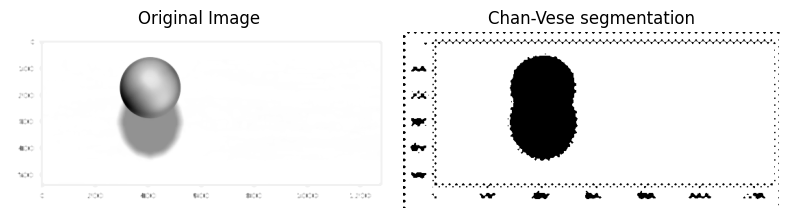

In [6]:
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import cv2
import numpy as np

image = cv2.imread(r'output.png', cv2.IMREAD_GRAYSCALE)

image = cv2.medianBlur(image, 5)

cv_result = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=50)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image")

ax[1].imshow(cv_result, cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation"
ax[1].set_title(title)

fig.tight_layout()
plt.show()
